# Decision Tree Modelling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Reading the data

In [2]:
#file used is a preprocessed file
df=pd.read_excel("storedata.xlsx")
df=df.drop(columns=['Unnamed: 0', 'index'],axis=1)
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


In [3]:
df.isnull().sum()

custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64

In [4]:
df['firstorder']= df.firstorder.astype('datetime64')
df['lastorder'] = df.lastorder.astype('datetime64')

# Data Information

In [5]:
df.dtypes

custid                object
retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
dtype: object

In [6]:
df.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000,30781.000000
mean,0.794581,28.136708,25.555884,5.672685,61.840438,0.037753,0.649102,0.095059,0.038920
std,0.404014,16.749906,29.556042,10.563981,40.941429,0.103961,0.477259,0.293301,0.193408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.083333,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.960000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.250000,0.040816,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


In [5]:
df.set_index(["custid"],inplace=True)

# One Hot Encoding

In [6]:
df=pd.concat((df.drop(columns=['city','favday'],axis=1),pd.get_dummies(df[['favday','city']],drop_first=True)),axis=1)

# Preprocessing of Decision trees

Advantage of using decision trees is that ordinal (continuous or discrete) input data does not require any significant preprocessing. In fact, the results will be consistent regardless of any scaling or translational normalization, since the trees can choose equivalent splitting points

# Train test split

In [9]:
x=df.drop("retained",axis=1)
y=df["retained"]
sc=StandardScaler()
scaled=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(scaled,y,test_size=0.3,random_state=2)

In [8]:
df["created"]=df["created"].astype("int64")
df["firstorder"]=df["firstorder"].astype("int64")
df["lastorder"]=df["lastorder"].astype("int64")
#Decision tree doesnot accept datetime so convertion into int

# Decision Tree Model

In [11]:
model=DecisionTreeClassifier(criterion="gini",random_state=2)
model.fit(xtrain,ytrain)
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.88      0.89      0.89      1917
           1       0.97      0.97      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.93      0.93      0.93      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9530048727666486
precision [0.88280847 0.97163606]
recall score [0.89201878 0.9689806 ]
f1_score [0.88738972 0.97030651]


In [12]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.892018779342723
sensitivity 0.9998589960518894
misclassified percentage 2.3088023088023086
correctclassified percentage 97.6911976911977


# Decision Tree Representation

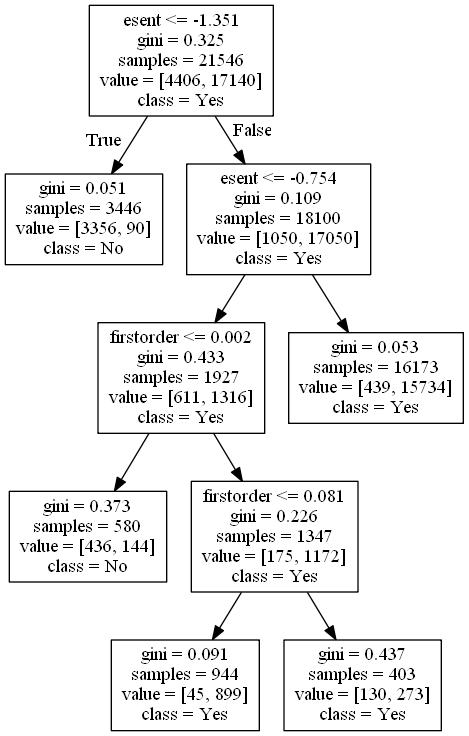

In [17]:
import pydotplus
from sklearn import tree
from IPython.display import Image
dt=DecisionTreeClassifier(max_leaf_nodes=5)
dtmodel=dt.fit(xtrain,ytrain)
lables=x.columns
dotdata=tree.export_graphviz(dtmodel,feature_names=lables,class_names=["No","Yes"])
graph=pydotplus.graph_from_dot_data(dotdata)
Image(graph.create_png())

# Hyper Parameter Tunning

In [20]:
tunedparameters=[{"criterion":['entropy', 'gini'],"max_depth":range(2, 10),"min_samples_split":range(2,10)}]
dtmodel=DecisionTreeClassifier(random_state=3)
grid=GridSearchCV(estimator=dtmodel,param_grid=tunedparameters,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}

In [29]:
model=DecisionTreeClassifier(criterion="gini",max_depth=7,min_samples_split=2,random_state=3)
model.fit(xtrain,ytrain)
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.60      0.19      0.29      1917
           1       0.82      0.97      0.89      7318

    accuracy                           0.81      9235
   macro avg       0.71      0.58      0.59      9235
weighted avg       0.77      0.81      0.76      9235

accuracy 0.8057390362750406
precision [0.5993538  0.82056639]
recall score [0.19353156 0.96611096]
f1_score [0.29258675 0.88741057]


In [30]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.19353155972874284
sensitivity 0.9998585772875124
misclassified percentage 17.21183800623053
correctclassified percentage 82.78816199376948


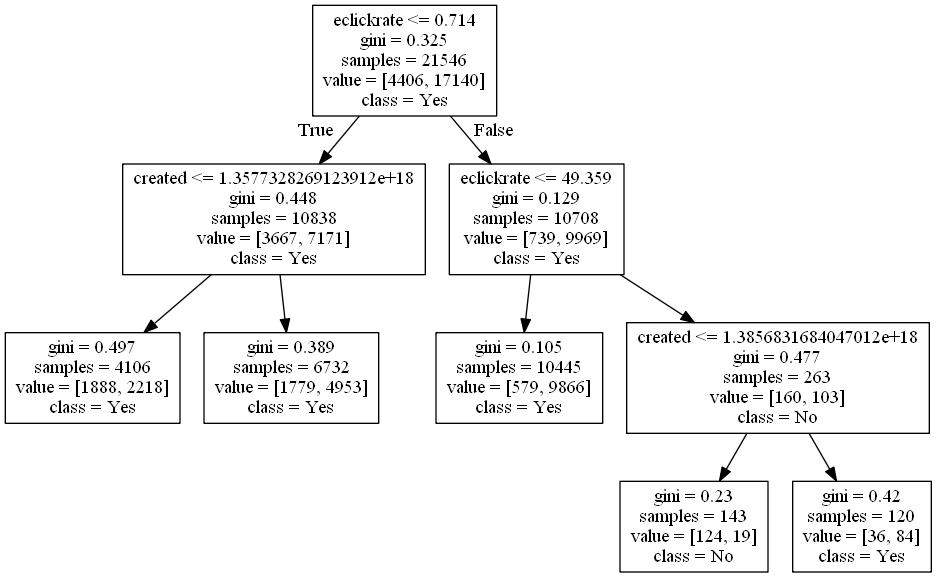

In [25]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=7,min_samples_split=2,max_leaf_nodes=5)
dtmodel=dt.fit(xtrain,ytrain)
lables=x.columns
dotdata=tree.export_graphviz(dtmodel,feature_names=lables,class_names=["No","Yes"])
graph=pydotplus.graph_from_dot_data(dotdata)
Image(graph.create_png())

In [23]:
tunedparameters=[{"criterion":["gini","entropy"],"max_depth":range(2,10),"min_samples_split":range(2,10),
                  "min_samples_leaf":range(0,5),"max_leaf_nodes":range(2,5)}]
dtmodel=DecisionTreeClassifier(random_state=3)
grid=GridSearchCV(estimator=dtmodel,param_grid=tunedparameters,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [14]:
model=DecisionTreeClassifier(criterion="gini",max_depth=2,max_leaf_nodes=4,min_samples_leaf=1,min_samples_split=2,random_state=3)
model.fit(xtrain,ytrain)
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.97      0.76      0.85      1917
           1       0.94      0.99      0.97      7318

    accuracy                           0.94      9235
   macro avg       0.95      0.88      0.91      9235
weighted avg       0.95      0.94      0.94      9235

accuracy 0.9442338927991337
precision [0.96547145 0.94009574]
recall score [0.75847679 0.99289423]
f1_score [0.84954718 0.96577391]


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 1.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


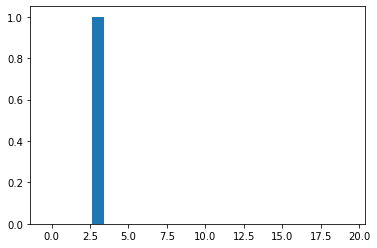

In [15]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [32]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.03182055294731351
sensitivity 0.9998627316403569
misclassified percentage 20.180395566181264
correctclassified percentage 79.81960443381874


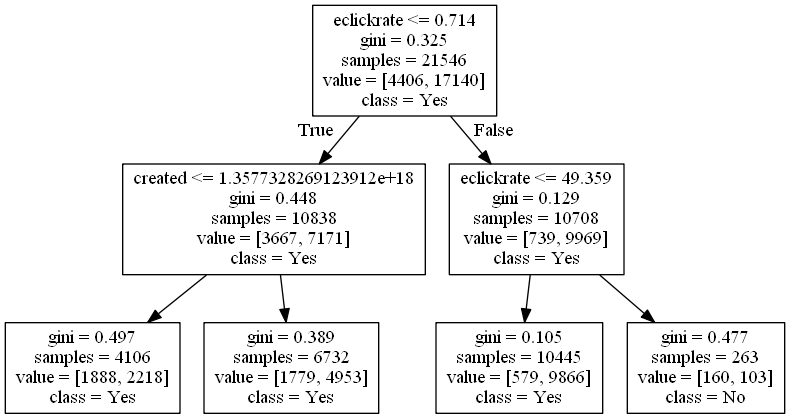

In [27]:
model=DecisionTreeClassifier(criterion="gini",max_depth=2,max_leaf_nodes=4,min_samples_leaf=1,min_samples_split=2,random_state=3)
dtmodel=model.fit(xtrain,ytrain)
lables=x.columns
dotdata=tree.export_graphviz(dtmodel,feature_names=lables,class_names=["No","Yes"])
graph=pydotplus.graph_from_dot_data(dotdata)
Image(graph.create_png())

# RFE selection

In [19]:
dc = DecisionTreeClassifier()

In [24]:
rfe = RFE(estimator=dc,n_features_to_select=5).fit(xtrain,ytrain)
rfe.ranking_
feature_ranking = pd.DataFrame([x.columns,rfe.ranking_],index=['Feature','Ranking']).T
rfe_feat=feature_ranking[feature_ranking.Ranking==1]
rfe_feat

,Feature,Ranking
0,esent,1
1,eopenrate,1
2,eclickrate,1
3,avgorder,1
4,ordfreq,1


In [33]:
x=df[["esent","eopenrate","eclickrate","avgorder","ordfreq"]]
y=df["retained"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=2)
model=DecisionTreeClassifier(criterion="gini",random_state=2)
model.fit(xtrain,ytrain)
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1917
           1       0.96      0.96      0.96      7318

    accuracy                           0.93      9235
   macro avg       0.90      0.90      0.90      9235
weighted avg       0.93      0.93      0.93      9235

accuracy 0.9329723876556578
precision [0.83837331 0.95776958]
recall score [0.83881064 0.9576387 ]
f1_score [0.83859192 0.95770413]


In [34]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.838810641627543
sensitivity 0.9998573262947639
misclassified percentage 3.4730002240645304
correctclassified percentage 96.52699977593548


# Backward Selection

In [28]:
lb = sfs(estimator= dc, k_features='best', scoring='f1',forward=False).fit(xtrain,ytrain)
back_feat = list(lb.k_feature_names_)
back_feat

['0', '5', '10']

In [32]:
lb.k_feature_idx_

(0, 5, 10)

In [47]:
x.columns

Index(['created', 'firstorder', 'lastorder', 'esent', 'eopenrate',
       'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill', 'doorstep',
       'favday_Monday', 'favday_Saturday', 'favday_Sunday', 'favday_Thursday',
       'favday_Tuesday', 'favday_Wednesday', 'city_BOM', 'city_DEL',
       'city_MAA'],
      dtype='object')

In [35]:
x=df[["created","eclickrate","doorstep"]]
y=df["retained"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=2)
model=DecisionTreeClassifier(criterion="gini",random_state=2)
model.fit(xtrain,ytrain)
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.43      0.37      0.40      1917
           1       0.84      0.87      0.86      7318

    accuracy                           0.77      9235
   macro avg       0.64      0.62      0.63      9235
weighted avg       0.76      0.77      0.76      9235

accuracy 0.7688142934488359
precision [0.43393939 0.84166117]
recall score [0.37350026 0.8723695 ]
f1_score [0.40145781 0.85674025]


In [36]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.3735002608242045
sensitivity 0.9998433829287392
misclassified percentage 14.478438930378223
correctclassified percentage 85.52156106962178


# Forward Selection

In [33]:
lf = sfs(estimator= dc, k_features='best', scoring='f1',forward=True).fit(xtrain,ytrain)
for_feat = list(lf.k_feature_names_)

In [34]:
for_feat

['0', '5', '6', '10']

In [37]:
x=df[["created","eclickrate","avgorder","doorstep"]]
y=df["retained"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=2)
model=DecisionTreeClassifier(criterion="gini",random_state=2)
model.fit(xtrain,ytrain)
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.40      0.38      0.39      1917
           1       0.84      0.85      0.84      7318

    accuracy                           0.75      9235
   macro avg       0.62      0.62      0.62      9235
weighted avg       0.75      0.75      0.75      9235

accuracy 0.7511640498105036
precision [0.39708266 0.83992416]
recall score [0.38341158 0.84749932]
f1_score [0.39012739 0.84369474]


In [38]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.38341158059467917
sensitivity 0.999838787683379
misclassified percentage 14.56896551724138
correctclassified percentage 85.43103448275862


The feature selected in the RFE,forward,Backward are different features selected
Based on the accuracy score we could say that the features selected from the RFE are more significant than the features selected in the Forward and Backward selection

# Random Forest

In [9]:
x=df.drop("retained",axis=1)
y=df["retained"]
sc=StandardScaler()
scaled=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(scaled,y,test_size=0.3,random_state=2)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(xtrain,ytrain)


In [11]:
ypred=model.predict(xtest)

In [12]:
accuracy_score(ytest,ypred)

0.9672983216025988

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,ypred)

0.9343210579868021

# Randomized search CV

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
estimator=RandomForestClassifier(n_jobs=-1, n_estimators=500)
distributions={'max_depth':[3,5,10,None],
              'max_features':randint(1,6),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,10)}
rf=RandomizedSearchCV(estimator,distributions)
rf.fit(xtrain,ytrain)
rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 8}

In [12]:
rf=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=None,max_features=5,min_samples_leaf=8)
model=rf.fit(xtrain,ytrain)

Feature: 0, Score: 0.04640
Feature: 1, Score: 0.04340
Feature: 2, Score: 0.04853
Feature: 3, Score: 0.65326
Feature: 4, Score: 0.10231
Feature: 5, Score: 0.06366
Feature: 6, Score: 0.01449
Feature: 7, Score: 0.00757
Feature: 8, Score: 0.00672
Feature: 9, Score: 0.00200
Feature: 10, Score: 0.00062
Feature: 11, Score: 0.00154
Feature: 12, Score: 0.00028
Feature: 13, Score: 0.00033
Feature: 14, Score: 0.00122
Feature: 15, Score: 0.00134
Feature: 16, Score: 0.00099
Feature: 17, Score: 0.00187
Feature: 18, Score: 0.00170
Feature: 19, Score: 0.00177


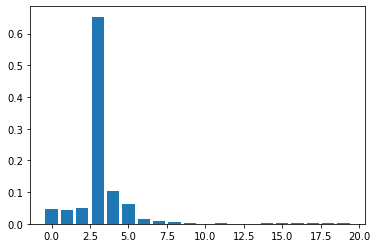

In [13]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [21]:
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1917
           1       0.97      0.99      0.98      7318

    accuracy                           0.97      9235
   macro avg       0.97      0.94      0.95      9235
weighted avg       0.97      0.97      0.97      9235

accuracy 0.9687060097455333
precision [0.96674312 0.969163  ]
recall score [0.87949922 0.99207434]
f1_score [0.92105982 0.98048484]


In [11]:
model.feature_importances_

array([4.26857422e-02, 4.28066854e-02, 4.58328324e-02, 6.77475971e-01,
       9.60711443e-02, 5.44706846e-02, 1.37314195e-02, 7.57644956e-03,
       5.27066328e-03, 2.17527710e-03, 5.25590480e-04, 1.63827647e-03,
       2.68538581e-04, 3.76994289e-04, 1.14662139e-03, 1.34148695e-03,
       9.65768896e-04, 1.75232850e-03, 1.96087460e-03, 1.92665080e-03])

In [22]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.8794992175273866
sensitivity 0.9998622779231511
misclassified percentage 2.527783830899978
correctclassified percentage 97.47221616910002


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
estimator=DecisionTreeClassifier(random_state=5)
distributions={'criterion':['gini','entropy'], 
             'max_features':randint(1,6), 
             'max_depth':[3,10,None],
             'min_samples_leaf':randint(1,10)}
rf=RandomizedSearchCV(estimator,distributions)
rf.fit(xtrain,ytrain)
rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 8}

In [16]:
model=DecisionTreeClassifier(criterion="gini",max_depth=None,max_features=5,min_samples_leaf=8,random_state=5)
model.fit(xtrain,ytrain)
ypredfull=model.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1917
           1       0.97      0.98      0.98      7318

    accuracy                           0.97      9235
   macro avg       0.95      0.94      0.95      9235
weighted avg       0.97      0.97      0.97      9235

accuracy 0.965674066053059
precision [0.93149946 0.97425823]
recall score [0.9008868  0.98264553]
f1_score [0.91593742 0.97843391]


Feature: 0, Score: 0.05351
Feature: 1, Score: 0.03090
Feature: 2, Score: 0.01638
Feature: 3, Score: 0.86743
Feature: 4, Score: 0.01534
Feature: 5, Score: 0.00391
Feature: 6, Score: 0.00411
Feature: 7, Score: 0.00292
Feature: 8, Score: 0.00055
Feature: 9, Score: 0.00026
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00084
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00045
Feature: 14, Score: 0.00072
Feature: 15, Score: 0.00042
Feature: 16, Score: 0.00009
Feature: 17, Score: 0.00124
Feature: 18, Score: 0.00054
Feature: 19, Score: 0.00037


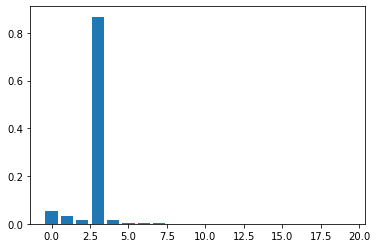

In [17]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [29]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.900886802295253
sensitivity 0.999860956618465
misclassified percentage 2.0968273136458446
correctclassified percentage 97.90317268635415
